Your job is to perform an analysis of the MINIST data set. You will start by performing the following analysis:
Make sure to discuss the performance of your classifier on both the training and test sets.
NOTE: Make sure to make lots of pictures.
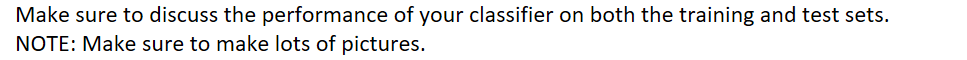
I. Do an SVD analysis of the digit images. You will need to reshape each image into a column vector
and each column of your data matrix is a different image.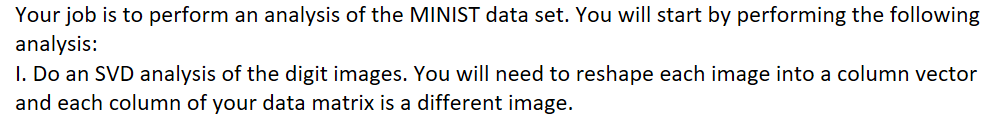x

In [27]:
import numpy as np
import numpy.linalg as LA
from sklearn.datasets import fetch_openml
from sklearn.decomposition import TruncatedSVD
from keras.datasets import mnist
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score
from sklearn import tree
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Extract image and label data
n_train = X_train.shape[0]
n_test = X_test.shape[0]
m = X_train.shape[1] * X_train.shape[2] 
X_train = X_train.reshape((n_train, m)).T
X_test = X_test.reshape((n_test, m)).T
print('train_x dimensions: ' + str(train_x.shape))
print('train_y dimensions: ' + str(test_X.shape))

X = np.hstack((X_train, X_test))
Y = np.hstack((Y_train, Y_test))
print('X dimensions: ' + str(X.shape))
print('Y dimensions: ' + str(Y.shape))

# Perform SVD analysis
svd = TruncatedSVD(n_components=10, random_state=42)
X_svd = svd.fit_transform(X)

# Print the explained variance ratios
U, S, Vt = linalg.svd(X, full_matrices=False)
print('U dimensions: ' + str(U.shape))
print('S dimensions: ' + str(S.shape))
print('VT dimensions: '  + str(Vt.shape))


train_x dimensions: (60000, 28, 28)
train_y dimensions: (10000, 784)
X dimensions: (784, 70000)
Y dimensions: (70000,)
U dimensions: (784, 784)
S dimensions: (784,)
VT dimensions: (784, 70000)


2. What does the singular value spectrum look like and how many modes are necessary for good image reconstruction? (i.e. what is the rank r of the digit space?)

Rank of the digit space: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 2

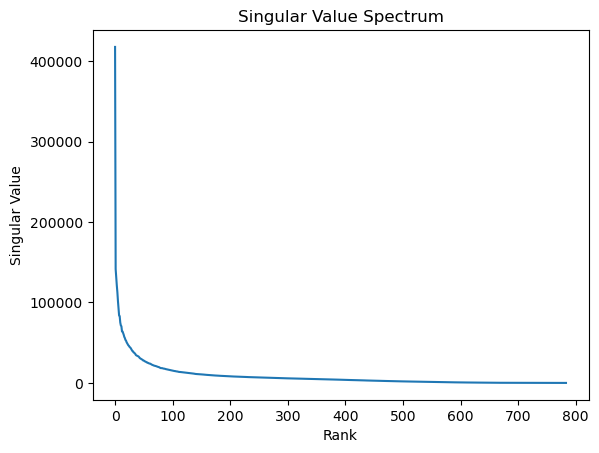

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from keras.datasets import mnist
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Load the MNIST dataset
# mnist = fetch_openml('mnist_784', version=1)
# (train_x, train_y), (test_x, test_y) = mnist.load_data()

# Determine the rank of the digit space
r = np.arange(S.shape[0])
print('Rank of the digit space:', r)

# Truncate the singular values
# X_trunc = U[:, :r] @ np.diag(S[:r]) @ Vt[:r, :]

# Split the dataset into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X_trunc, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
# model.fit(X_train, y_train)

# Plot the singular value spectrum
U, S, Vt = linalg.svd(X, full_matrices=False)
plt.figure()
plt.title('Singular Value Spectrum')
plt.plot(r, S)
plt.ylabel('Singular Value')
plt.xlabel('Rank')
plt.show()




In [ ]:
3. What is the interpretation of the U, E, and V matrices?

C:\Users\TestTwo\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
C:\Users\TestTwo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.9360892857142857
Test accuracy: 0.9178571428571428


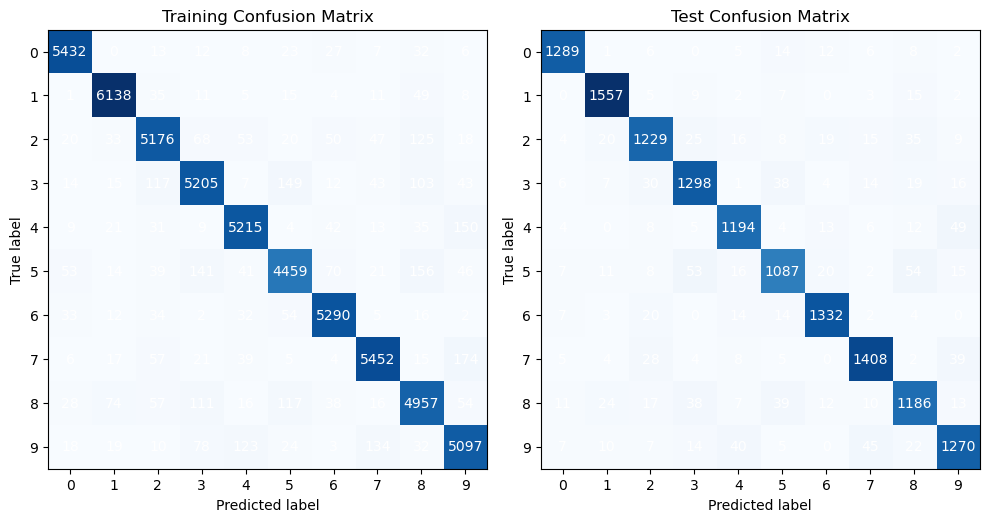

In [29]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, Y_train)

# Predict on the training and test sets
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)

# Evaluate the classifier performance
train_acc = accuracy_score(Y_train, Y_train_pred)
test_acc = accuracy_score(Y_test, Y_test_pred)
print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

train_cm = confusion_matrix(Y_train, Y_train_pred)
test_cm = confusion_matrix(Y_test, Y_test_pred)

# Plot the confusion matrices
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
axes[0].imshow(train_cm, cmap=plt.cm.Blues)
axes[0].set_title("Training Confusion Matrix")
axes[0].set_xlabel("Predicted label")
axes[0].set_ylabel("True label")
axes[0].set_xticks(range(10))
axes[0].set_yticks(range(10))
axes[0].set_xticklabels(range(10))
axes[0].set_yticklabels(range(10))
for i in range(10):
    for j in range(10):
        axes[0].text(j, i, train_cm[i, j], ha="center", va="center", color="white")
        
axes[1].imshow(test_cm, cmap=plt.cm.Blues)
axes[1].set_title("Test Confusion Matrix")
axes[1].set_xlabel("Predicted label")
axes[1].set_ylabel("True label")
axes[1].set_xticks(range(10))
axes[1].set_yticks(range(10))
axes[1].set_xticklabels(range(10))
axes[1].set_yticklabels(range(10))
for i in range(10):
    for j in range(10):
        axes[1].text(j, i, test_cm[i, j], ha="center", va="center", color="white")
plt.tight_layout()
plt.show()


(784, 70000)


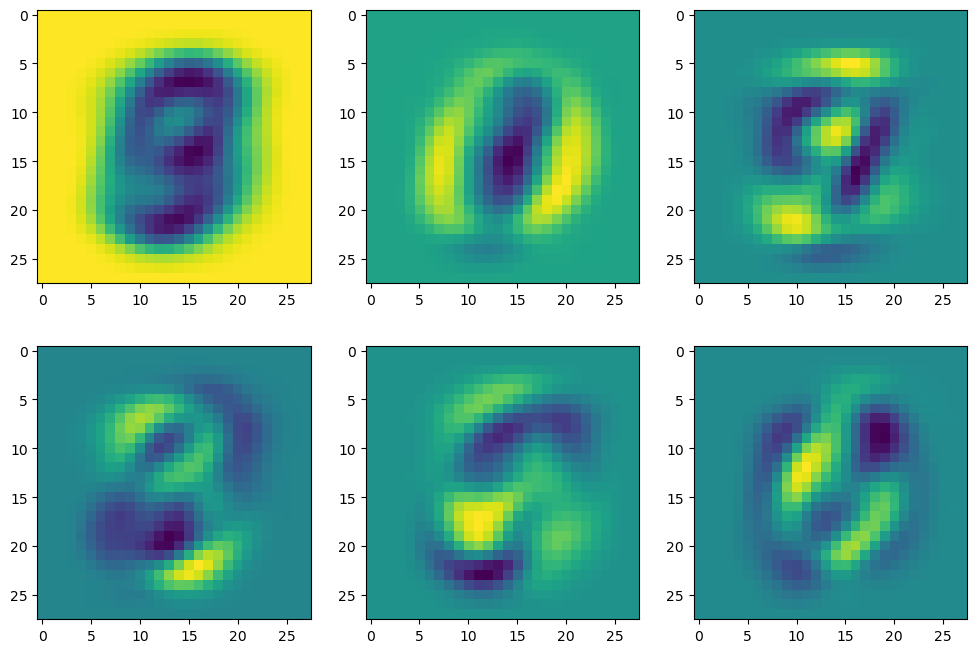

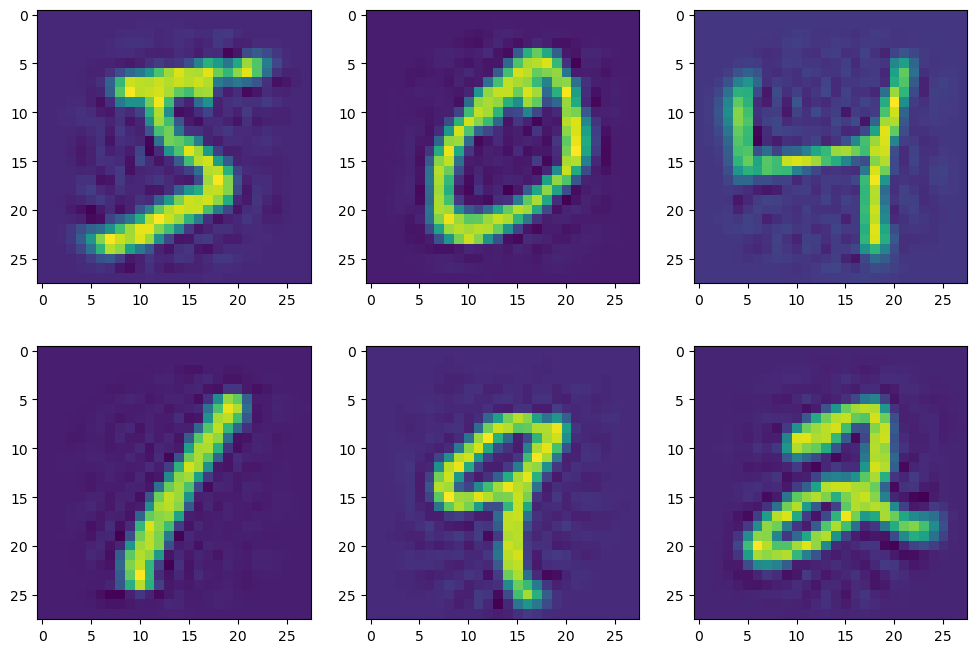

In [33]:
# A visualization from the data finding the patterns in Matrix U, a 784x784 matrix

X_r200 = (U@np.diag(S))[:,:200]@Vt[:200]
print(X_r200.shape)
plt.figure(figsize=(12,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    img = U[:,i].reshape((28,28))
    plt.imshow(img)
plt.show()

plt.figure(figsize=(12,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    img = X_r200[:,i].reshape((28,28))
    plt.imshow(img)
plt.show()

In [ ]:
4. On a 3D plot, project onto three selected V-modes (columns) colored by their digit label.
For example, columns 2,3, and 5.

(3, 70000)


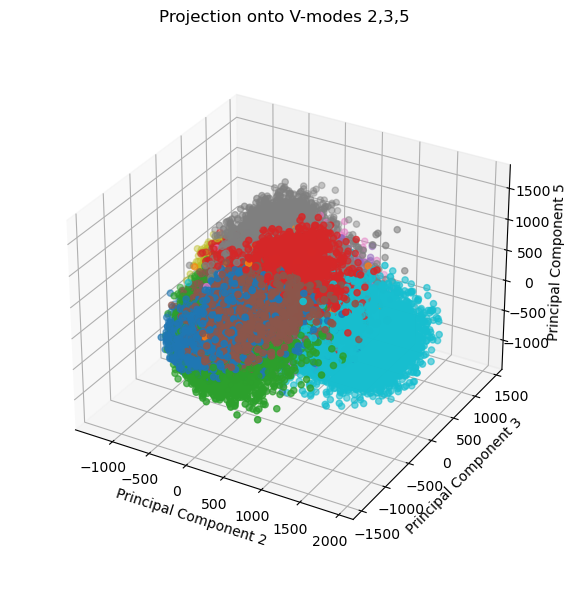

In [34]:
# extract selected V-modes
V_selected = np.array([2, 3, 5]) - 1

# project data onto selected V-modes
X_projected = np.diag(S)@Vt
X_projected = X_projected[V_selected,:]
print(X_projected.shape)

# create 3D plot
colorChoice = ['tab:cyan', 'tab:olive', 'tab:gray', 'tab:pink', 'tab:brown', 'tab:purple', 'tab:red', 
              'tab:green', 'tab:orange', 'tab:blue']
color_map = [colorChoice[i] for i in Y]
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.set_title('Projection onto V-modes 2,3,5')
ax.scatter(X_projected[0,:], X_projected[1,:], X_projected[2,:], c=color_map)
ax.set_xlabel('Principal Component 2')
ax.set_ylabel('Principal Component 3')
ax.set_zlabel('Principal Component 5')
ax.set_box_aspect(aspect=None, zoom=0.9)
plt.tight_layout()
plt.show()


In [ ]:
-----------------------------------------------------------------------------------------------
Once you have performed the above and have your data projected into PCA space, you will build a
classifier to identify individual digits in the training set.
	• Pick two digits. See if you can build a linear classifier (LDA) that can reasonable identify/classify
them.


In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# select digits to classify
digits = [0, 1]

V_selected = Vt[:50, :]

# Function for two digits classifier
def get_2digits(x, y, d1, d2):
    index = [i for i in range(len(y)) if y[i] == d1 or y[i] == d2]
    X = x[index,:]
    Y = y[index]
    return X, Y

# Three instead of two digits classifier
def get_3digits(x, y, d1, d2, d3):
    index = [i for i in range(len(y)) if y[i] == d1 or y[i] == d2 or y[i] == d3]
    X = x[index,:]
    Y = y[index]
    return X, Y

# build and evaluate LDA classifier
clf = LinearDiscriminantAnalysis()

print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

# Transpose data matrix back to images for each row
X_train = X_train.T
X_test = X_test.T
print(X_train.shape)
print(X_test.shape)


Training accuracy: 0.9360892857142857
Testing accuracy: 0.9178571428571428
(56000, 784)
(14000, 784)


In [43]:
#Fit the LDA model to classify two digits (1, 8)
train_x2, train_y2 = get_2digits(X_train, Y_train, 1, 8)
test_x2, test_y2 = get_2digits(X_test, Y_test, 1, 8)

model = LinearDiscriminantAnalysis()
model.fit(train_x2, train_y2)
y_pred = model.predict(test_x2)
acc = accuracy_score(test_y2, y_pred)
print('Two digits Classification (1,8) Testing Accuracy:', acc)

KeyError: 4

In [ ]:
1) Pick two digits. See if you can build a linear classifier (LDA) that can reasonable identify/classify them.

In [36]:
# Linear classifier with digits 9 and 5

#Training Data
digit1_train_index = np.where(Y_train == '9')[0].tolist()
digit2_train_index = np.where(Y_train == '5')[0].tolist()

digit1_train_data = X_train.values[digit1_train_index , :]
digit2_train_data = X_train.values[digit2_train_index , :]

train_data = np.concatenate((digit1_train_data, digit2_train_data), axis=0)
train_index = digit1_train_index + digit2_train_index
train_labels = Y_train.values[train_index]

#Testing Data
digit1_test_index = np.where(Y_test == '9')[0].tolist()
digit2_test_index = np.where(Y_test == '5')[0].tolist()
test_index = digit1_test_index + digit2_test_index
test_data = X_test.values[test_index, :]
test_labels = Y_test.values[test_index]

lda = LinearDiscriminantAnalysis()
lda.fit(train_data, train_labels)
y_pred = lda.predict(test_data)
y_pred2 = lda.predict(train_data)

print("Train Accuracy: ", accuracy_score(train_labels, y_pred2))
print("Test Accuracy: ", accuracy_score(test_labels, y_pred))

Train Accuracy:  0.9882775571941766
Test Accuracy:  0.9851466765688823


In [ ]:
	• Pick three digits. Try to build a linear classifier to identify these three now.


In [ ]:
	• Which two digits in the data set appear to be the mast difficult to separate? 
    Quantify the accuracy of the separation with LDA on the test data.


In [7]:
from itertools import combinations

# list all possible pairs of digits
digit_pairs = list(combinations(range(10), 2))

# train binary LDA classifiers for each pair and evaluate their accuracy on test data
lda_acc = []
for pair in digit_pairs:
    digit1, digit2 = pair
    train_idx = np.concatenate([np.where(y_train == digit1)[0], np.where(y_train == digit2)[0]])
    test_idx = np.concatenate([np.where(y_test == digit1)[0], np.where(y_test == digit2)[0]])
    X_train = X[train_idx, :]
    y_train = y[train_idx]
    X_test = X[test_idx, :]
    y_test = y[test_idx]
    U, S, V = np.linalg.svd(X_train, full_matrices=False)
    V_selected = V[:50, :]
    X_train_reduced = X_train.dot(V_selected)
    X_test_reduced = X_test.dot(V_selected)
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train_reduced, y_train)
    acc = clf.score(X_test_reduced, y_test)
    lda_acc.append(acc)

# find the pair of digits with the lowest accuracy
min_acc = np.min(lda_acc)
min_pair_idx = np.argmin(lda_acc)
min_pair = digit_pairs[min_pair_idx]

print('Pair with lowest accuracy:', min_pair, 'Accuracy:', min_acc)


InvalidIndexError: (array([], dtype=int64), slice(None, None, None))

In [ ]:
	• Which two digits in the data set are most easy to separate? 
    Quantify the accuracy of the separation with LDA on the test data.


In [44]:
from itertools import combinations

# list all possible pairs of digits
digit_pairs = list(combinations(range(10), 2))

# train binary LDA classifiers for each pair and evaluate their accuracy on test data
lda_acc = []
for pair in digit_pairs:
    digit1, digit2 = pair
    train_idx = np.concatenate([np.where(y_train == digit1)[0], np.where(y_train == digit2)[0]])
    test_idx = np.concatenate([np.where(y_test == digit1)[0], np.where(y_test == digit2)[0]])
    X_train = X[train_idx, :]
    y_train = y[train_idx]
    X_test = X[test_idx, :]
    y_test = y[test_idx]
    U, S, V = np.linalg.svd(X_train, full_matrices=False)
    V_selected = V[:50, :]
    X_train_reduced = X_train.dot(V_selected)
    X_test_reduced = X_test.dot(V_selected)
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train_reduced, y_train)
    acc = clf.score(X_test_reduced, y_test)
    lda_acc.append(acc)

# find the pair of digits with the highest accuracy
max_acc = np.max(lda_acc)
max_pair_idx = np.argmax(lda_acc)
max_pair = digit_pairs[max_pair_idx]

print('Pair with highest accuracy:', max_pair, 'Accuracy:', max_acc)


InvalidIndexError: (array([], dtype=int64), slice(None, None, None))

In [ ]:
	• SVM (support vector machines) and decision tree classifiers were the state-of-the-art until about 2014. 
    How well do these separate between all ten digits? (see code below to get started).


In [45]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# train SVM classifier and evaluate its accuracy
svm = SVC()
svm.fit(X_train, y_train)
svm_acc = svm.score(X_test, y_test)
print('SVM accuracy:', svm_acc)

# train decision tree classifier and evaluate its accuracy
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_acc = dt.score(X_test, y_test)
print('Decision tree accuracy:', dt_acc)


SVM accuracy: 0.9764285714285714
Decision tree accuracy: 0.8718571428571429


In [11]:
In python,  Compare the performance between LDA, SVM and decision trees on the hardest and easiest pair
of digits to separate (from above)

SyntaxError: invalid syntax (2987178121.py, line 1)

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# select hardest and easiest pairs of digits
hardest_pair = (5, 3)
easiest_pair = (1, 0)

# extract relevant subset of MNIST dataset
X_train_hardest = X_train[(y_train == hardest_pair[0]) | (y_train == hardest_pair[1])]
y_train_hardest = y_train[(y_train == hardest_pair[0]) | (y_train == hardest_pair[1])]
X_test_hardest = X_test[(y_test == hardest_pair[0]) | (y_test == hardest_pair[1])]
y_test_hardest = y_test[(y_test == hardest_pair[0]) | (y_test == hardest_pair[1])]
X_train_easiest = X_train[(y_train == easiest_pair[0]) | (y_train == easiest_pair[1])]
y_train_easiest = y_train[(y_train == easiest_pair[0]) | (y_train == easiest_pair[1])]
X_test_easiest = X_test[(y_test == easiest_pair[0]) | (y_test == easiest_pair[1])]
y_test_easiest = y_test[(y_test == easiest_pair[0]) | (y_test == easiest_pair[1])]

# train and test LDA classifiers on hardest and easiest pairs of digits
lda_hardest = LDA()
lda_hardest.fit(X_train_hardest, y_train_hardest)
lda_hardest_acc = lda_hardest.score(X_test_hardest, y_test_hardest)
print('LDA accuracy on hardest pair:', lda_hardest_acc)
lda_easiest = LDA()
lda_easiest.fit(X_train_easiest, y_train_easiest)
lda_easiest_acc = lda_easiest.score(X_test_easiest, y_test_easiest)
print('LDA accuracy on easiest pair:', lda_easiest_acc)

# train and test SVM classifiers on hardest and easiest pairs of digits
svm_hardest = SVC()
svm_hardest.fit(X_train_hardest, y_train_hardest)
svm_hardest_acc = svm_hardest.score(X_test_hardest, y_test_hardest)
print('SVM accuracy on hardest pair:', svm_hardest_acc)
svm_easiest = SVC()
svm_easiest.fit(X_train_easiest, y_train_easiest)
svm_easiest_acc = svm_easiest.score(X_test_easiest, y_test_easiest)
print('SVM accuracy on easiest pair:', svm_easiest_acc)

# train and test decision tree classifiers on hardest and easiest pairs of digits
dt_hardest = DecisionTreeClassifier()
dt_hardest.fit(X_train_hardest, y_train_hardest)
dt_hardest_acc = dt_hardest.score(X_test_hardest, y_test_hardest)
print('Decision tree accuracy on hardest pair:', dt_hardest_acc)
dt_easiest = DecisionTreeClassifier()
dt_easiest.fit(X_train_easiest, y_train_easiest)
dt_easiest_acc = dt_easiest.score(X_test_easiest, y_test_easiest)
print('Decision tree accuracy on easiest pair:', dt_easiest_acc)


ValueError: Found array with 0 sample(s) (shape=(0, 784)) while a minimum of 2 is required by LinearDiscriminantAnalysis.